In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel("analiza_gestosci.xlsx")  # Replace with your actual file name

display(df)


,vehicle_ID,date,vehicle_mass_kg,mass_end,mass_0,mass_of_garbage_kg,capacity_used_proc,V_body_m3,V_garbage_m3,dencity_kg_m3_1,V_garbage_m3+1.6m3_V_garbage_in_tailgate,dencity_kg_m3_2,V_garbage_m3+3m3_V_garbage_in_tailgate,dencity_kg_m3_3
0,21482,2024-09-30,15766,7388,1030,NaN,0.820,22.1,NaN,NaN,NaN,NaN,NaN,NaN
1,21482,2024-09-27,15766,6696,1027,NaN,0.606,22.1,NaN,NaN,NaN,NaN,NaN,NaN
2,21482,2024-09-26,15766,7559,1147,NaN,0.670,22.1,NaN,NaN,NaN,NaN,NaN,NaN
3,21482,2024-09-25,15766,7427,1146,NaN,0.697,22.1,NaN,NaN,NaN,NaN,NaN,NaN
4,21482,2024-09-24,15766,6155,952,NaN,0.605,22.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,21323,2024-09-06,15766,6808,979,NaN,0.937,22.1,NaN,NaN,NaN,NaN,NaN,NaN
130,21323,2024-09-05,15766,6030,1340,NaN,0.672,22.1,NaN,NaN,NaN,NaN,NaN,NaN
131,21323,2024-09-04,15766,6349,1105,NaN,0.598,22.1,NaN,NaN,NaN,NaN,NaN,NaN
132,21323,2024-09-03,15766,7100,944,NaN,0.942,22.1,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Truck_1 = df[df['vehicle_ID'] == 21482]
Truck_2 = df[df['vehicle_ID'] == 21563]
Truck_3 = df[df['vehicle_ID'] == 21572]
Truck_4 = df[df['vehicle_ID'] == 21322]
Truck_5 = df[df['vehicle_ID'] == 21169]
Truck_6 = df[df['vehicle_ID'] == 21558]
Truck_7 = df[df['vehicle_ID'] == 21323]

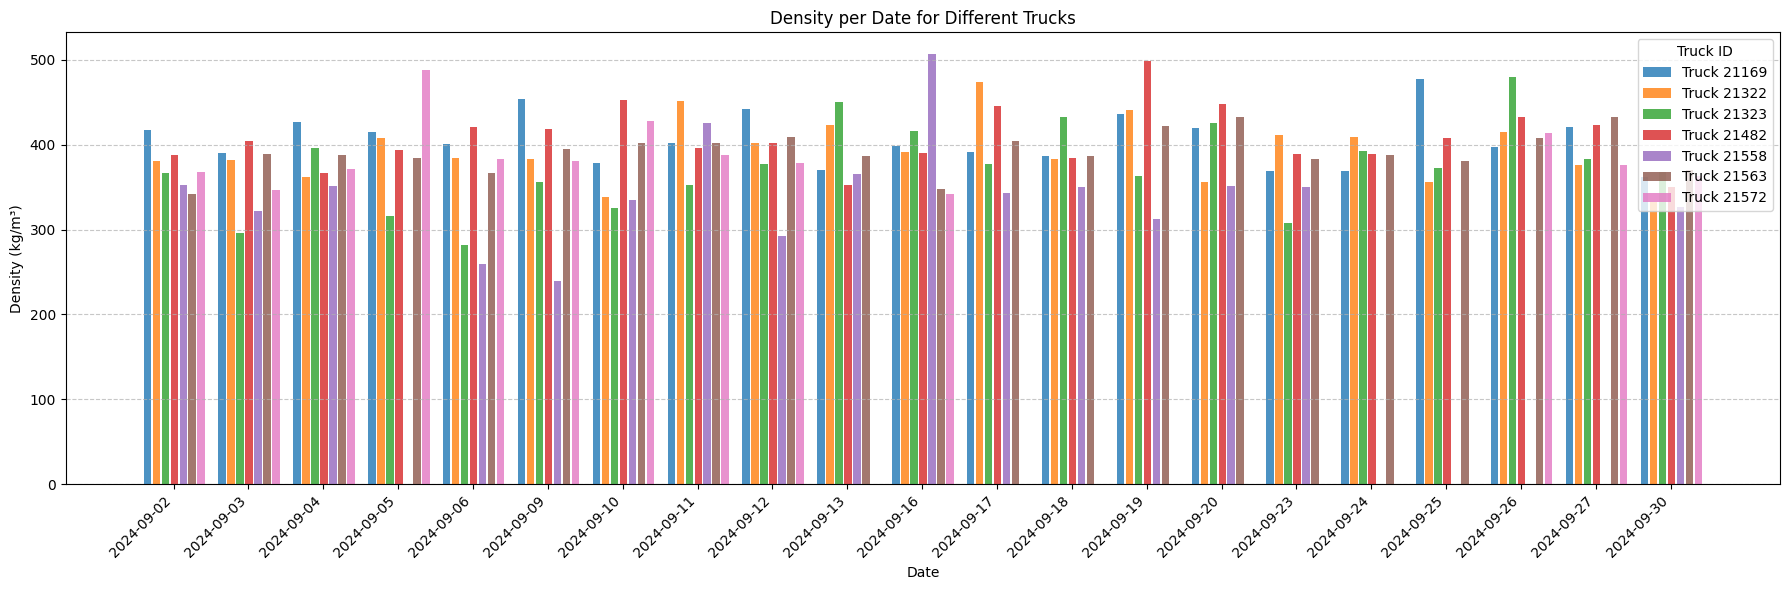

In [13]:
groups = df.pivot(index="date", columns="vehicle_ID", values="dencity_kg_m3")

fig, ax = plt.subplots(figsize=(18, 6))

bar_width = 0.10  # Zmniejszona szerokość słupków
x = np.arange(len(groups.index))

for i, vehicle_id in enumerate(groups.columns):
    ax.bar(x + i * bar_width * 1.2, groups[vehicle_id], width=bar_width, label=f'Truck {vehicle_id}', alpha=0.8)

ax.set_xticks(x + (len(groups.columns) / 2) * bar_width)  # Centrowanie etykiet dat
ax.set_xticklabels(groups.index.strftime("%Y-%m-%d"), rotation=45, ha="right")

ax.set_xlabel("Date")
ax.set_ylabel("Density (kg/m³)")
ax.set_title("Density per Date for Different Trucks")
ax.legend(title="Truck ID")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [3]:
density_cols = ["mass_of_garbage_kg", "capacity_used_proc","V_garbage_m3","dencity_kg_m3","V_garbage_m3+1.6m3_V_garbage_in_tailgate","dencity_kg_m3","V_garbage_m3+3m3_V_garbage_in_tailgate","dencity_kg_m3"]
density_stats = df[density_cols].describe()
print(density_stats)

       mass_of_garbage_kg  capacity_used_proc  V_garbage_m3  dencity_kg_m3  \
count          134.000000          134.000000    134.000000     134.000000   
mean          5943.276119            0.704366     15.566481     387.526554   
std            962.933772            0.140410      3.103058      44.081721   
min           2724.000000            0.243000      5.370300     239.814226   
25%           5230.000000            0.605250     13.376025     364.288222   
50%           5970.500000            0.698500     15.436850     387.290582   
75%           6611.250000            0.809000     17.878900     414.408922   
max           9006.000000            0.947000     20.928700     507.234233   

       V_garbage_m3+1.6m3_V_garbage_in_tailgate  dencity_kg_m3  \
count                                134.000000     134.000000   
mean                                  17.166481     387.526554   
std                                    3.103058      44.081721   
min                              

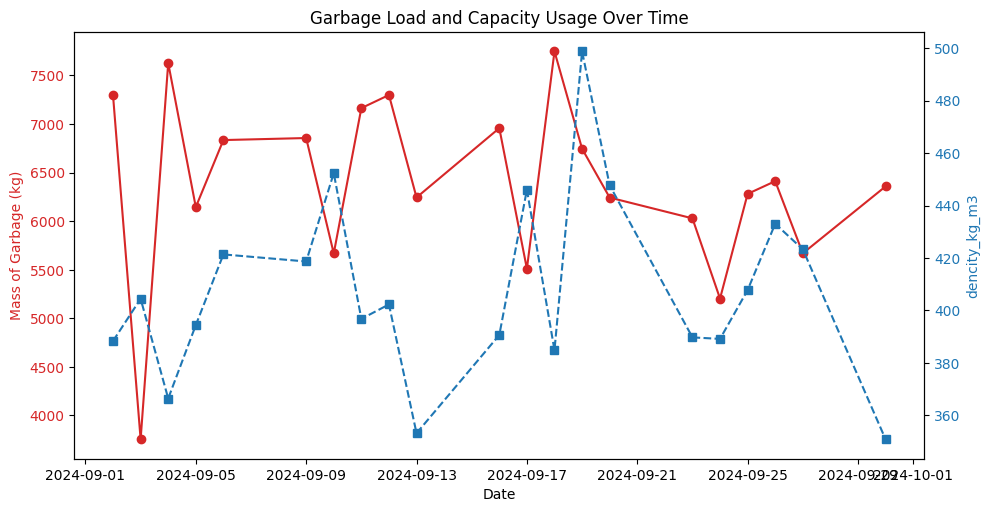

In [ ]:
import matplotlib.pyplot as plt
# Sort by Date
df = df.sort_values(by="date")
vehicle1 = df[df["vehicle_ID"] == 21482] 

# Create Figure and Axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Mass of Garbage on Left Y-Axis
color = "tab:red"
ax1.set_xlabel("Date")
ax1.set_ylabel("Mass of Garbage (kg)", color=color)
ax1.plot(vehicle1["date"], vehicle1["mass_of_garbage_kg"], color=color, marker="o", linestyle="-")
ax1.tick_params(axis="y", labelcolor=color)

# Create Second Y-Axis (Capacity Used %)
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("dencity_kg_m3", color=color)
ax2.plot(vehicle1["date"], vehicle1["dencity_kg_m3"], color=color, marker="s", linestyle="--")
ax2.tick_params(axis="y", labelcolor=color)

# Improve Layout
fig.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title("Garbage Load and Capacity Usage Over Time")
plt.show()

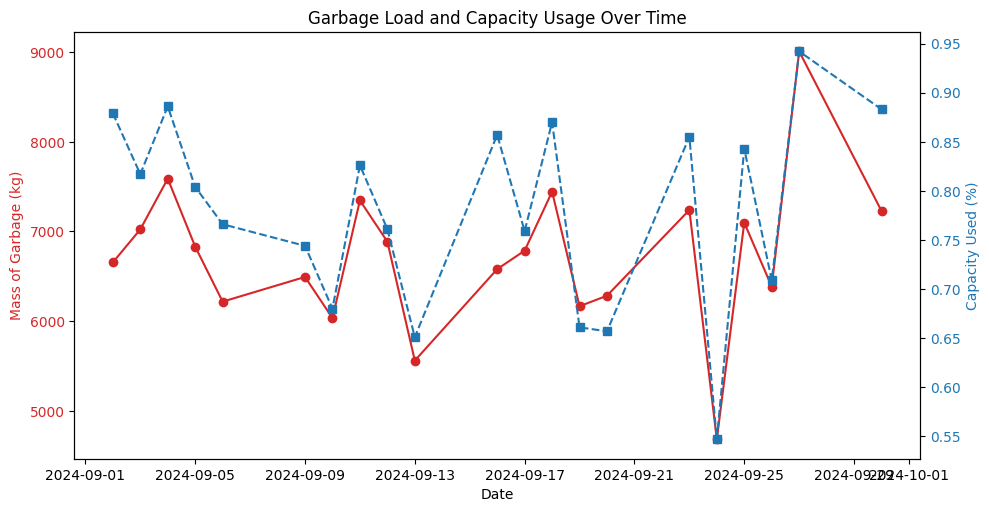

In [ ]:
# Sort by Date
df = df.sort_values(by="date")
vehicle2 = df[df["vehicle_ID"] == 21563] 

# Create Figure and Axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Mass of Garbage on Left Y-Axis
color = "tab:red"
ax1.set_xlabel("Date")
ax1.set_ylabel("Mass of Garbage (kg)", color=color)
ax1.plot(vehicle2["date"], vehicle2["mass_of_garbage_kg"], color=color, marker="o", linestyle="-")
ax1.tick_params(axis="y", labelcolor=color)

# Create Second Y-Axis (Capacity Used %)
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("Capacity Used (%)", color=color)
ax2.plot(vehicle2["date"], vehicle2["capacity_used_proc"], color=color, marker="s", linestyle="--")
ax2.tick_params(axis="y", labelcolor=color)

# Improve Layout
fig.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title("Garbage Load and Capacity Usage Over Time")
plt.show()